# Load NIPS paper

In [1]:
import pandas as pd

papers = pd.read_csv('paper.csv')
papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


# Preprocessing the data

In [2]:
papers.drop(['id', 'event_type', 'pdf_name'], axis=1, inplace=True)

papers.head()

,year,title,abstract,paper_text
0,1987,Self-Organization of Associative Database and ...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,1987,A Mean Field Theory of Layer IV of Visual Cort...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,1988,Storing Covariance by the Associative Long-Ter...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1994,Bayesian Query Construction for Neural Network...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1994,"Neural Network Ensembles, Cross Validation, an...",Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [3]:
import re

print(papers['title'].head())
papers['title_processed'] = papers['title'].map(lambda x: re.sub('[,\.!?]', '', x))
papers['title_processed'] = papers['title_processed'].str.lower()

papers.head()

0    Self-Organization of Associative Database and ...
1    A Mean Field Theory of Layer IV of Visual Cort...
2    Storing Covariance by the Associative Long-Ter...
3    Bayesian Query Construction for Neural Network...
4    Neural Network Ensembles, Cross Validation, an...
Name: title, dtype: object


,year,title,abstract,paper_text,title_processed
0,1987,Self-Organization of Associative Database and ...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...,self-organization of associative database and ...
1,1987,A Mean Field Theory of Layer IV of Visual Cort...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...,a mean field theory of layer iv of visual cort...
2,1988,Storing Covariance by the Associative Long-Ter...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...,storing covariance by the associative long-ter...
3,1994,Bayesian Query Construction for Neural Network...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...,bayesian query construction for neural network...
4,1994,"Neural Network Ensembles, Cross Validation, an...",Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a...",neural network ensembles cross validation and ...


# Visualizing the demand of machine learning

<Axes: xlabel='year'>

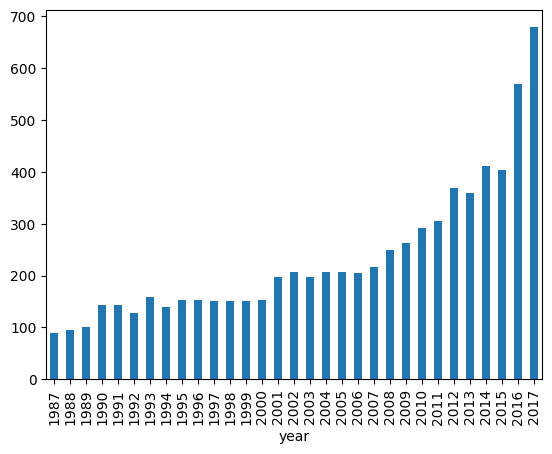

In [4]:
groups = papers.groupby('year')

counts = groups.size()

import matplotlib.pyplot
counts.plot(kind='bar')

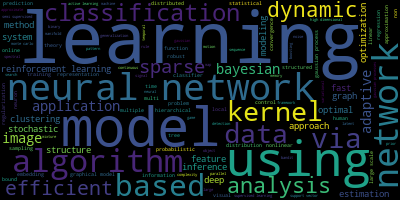

In [5]:
import wordcloud

s = " "
long_string = s.join(papers['title_processed'])

wordcloud = wordcloud.WordCloud()

wordcloud.generate(long_string)
wordcloud.to_image()

In [6]:
wordcloud.to_file("img/nips.png")

# LDA analysis

In this step of text analysis, we prepared the research paper titles for Latent Dirichlet Allocation (LDA) analysis, a powerful method for topic detection. We began by tokenizing the titles, removing common stop words, and creating a Document-Term Matrix (DTM) using the CountVectorizer. The DTM represents the frequency of words in each research title. Subsequently, we applied LDA to discover latent topics within the dataset, allowing us to uncover the underlying themes in the research titles. Finally, we visualized the top 10 words associated with each identified topic through bar charts, providing a concise and interpretable summary of the main themes present in the NIPS conference papers. This process aids in understanding the diverse topics explored in the field of machine learning over the 30-year span of NIPS conferences.

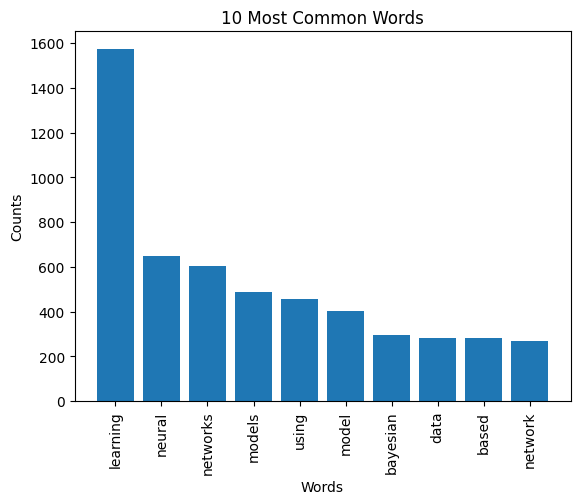

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt

def plot_10_most_common_words(count_data, count_vectorizer):
    words = count_vectorizer.get_feature_names_out()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts += t.toarray()[0]

    count_dict = zip(words, total_counts)
    count_dict = sorted(count_dict, key=lambda x: x[1], reverse=True)[:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words))

    plt.bar(x_pos, counts, align='center')
    plt.xticks(x_pos, words, rotation=90)
    plt.xlabel('Words')
    plt.ylabel('Counts')
    plt.title('10 Most Common Words')
    plt.show()

count_vectorizer = CountVectorizer(stop_words='english', max_features=1000)  # Limit vocabulary to top 1000 words

count_data = count_vectorizer.fit_transform(papers['title'])

plot_10_most_common_words(count_data, count_vectorizer)


In [8]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

from sklearn.decomposition import LatentDirichletAllocation as LDA
 
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
number_topics = 10
number_words = 10

lda = LDA(n_components=number_topics)
lda.fit(count_data)

print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
learning multi image active online machine application multiple classification sparse

Topic #1:
data clustering analysis vector spectral support probabilistic dynamic machines learning

Topic #2:
models inference gaussian process time variational linear bayesian methods graphical

Topic #3:
recognition markov model optimal visual models speech hidden decision matching

Topic #4:
learning optimization kernel large algorithms stochastic functions classification scale algorithm

Topic #5:
estimation gradient function matrix approximation high descent rank low dimensional

Topic #6:
feature using detection neurons learning natural images model analog motion

Topic #7:
learning recurrent complexity order networks kernels structure distributions structured estimation

Topic #8:
learning information fast bayesian search policy nonparametric prediction model graphs

Topic #9:
neural networks learning network deep reinforcement control using training model
